# AutoEncoders 

In [3]:
import tensorflow as tf
import numpy as np
%matplotlib inline

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [6]:
y_train = y_train.astype('float32') / 255.
y_test = y_test.astype('float32') / 255.

In [7]:
x_image_train = tf.reshape(x_train, [-1, 28, 28, 1])
x_image_train = tf.cast(x_image_train, 'float32')

x_image_test = tf.reshape(x_test, [-1, 28, 28, 1])
x_image_test = tf.cast(x_image_test, 'float32')


In [8]:
print(x_train.shape)

(60000, 28, 28)


In [9]:
flatten_layer = tf.keras.layers.Flatten()
x_train = flatten_layer(x_train)

In [10]:
print(x_train.shape)

(60000, 784)


Parameters that are going to be used by our NN.

In [11]:
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10
global_step = tf.Variable(0)
total_batch = int(len(x_train) / batch_size)


# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
encoding_layer = 32 # final encoding bottleneck features
n_input = 784 # MNIST data input (img shape: 28*28)



Encoder

In [12]:
encoding_1 = tf.keras.layers.Dense(n_hidden_1, activation=tf.nn.sigmoid)
encoding_2 = tf.keras.layers.Dense(n_hidden_2, activation=tf.nn.sigmoid)
encoding_final = tf.keras.layers.Dense(encoding_layer, activation=tf.nn.relu)

# Building the encoder
def encoder(x):
  x_reshaped = flatten_layer(x)
  # Encoder first layer with sigmoid activation #1
  layer_1 = encoding_1(x_reshaped)
  # Encoder second layer with sigmoid activation #2
  layer_2 = encoding_2(layer_1)
  code = encoding_final(layer_2)
  return code

Decoder

In [13]:
decoding_1 = tf.keras.layers.Dense(n_hidden_2, activation=tf.nn.sigmoid)
decoding_2 = tf.keras.layers.Dense(n_hidden_1, activation=tf.nn.sigmoid)
decoding_final = tf.keras.layers.Dense(n_input)

# Building the decoder
def decoder(x):
  # Decoder first layer with sigmoid activation #1
  layer_1 = decoding_1(x)
  # Decoder second layer with sigmoid activation #2
  layer_2 = decoding_2(layer_1)
  decode = self.decoding_final(layer_2)
  return decode

Constructing the model. Define it with cost and grad

In [14]:
class AutoEncoder(tf.keras.Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()

    self.n_hidden_1 = n_hidden_1 # 1st layer num features
    self.n_hidden_2 = n_hidden_2 # 2nd layer num features
    self.encoding_layer = encoding_layer
    self.n_input = n_input # MNIST data input (img shape: 28*28)

    self.flatten_layer = tf.keras.layers.Flatten()
    self.encoding_1 = tf.keras.layers.Dense(self.n_hidden_1, activation=tf.nn.sigmoid)
    self.encoding_2 = tf.keras.layers.Dense(self.n_hidden_2, activation=tf.nn.sigmoid)
    self.encoding_final = tf.keras.layers.Dense(self.encoding_layer, activation=tf.nn.relu)
    self.decoding_1 = tf.keras.layers.Dense(self.n_hidden_2, activation=tf.nn.sigmoid)
    self.decoding_2 = tf.keras.layers.Dense(self.n_hidden_1, activation=tf.nn.sigmoid)
    self.decoding_final = tf.keras.layers.Dense(self.n_input)

  # Building the encoder
  def encoder(self, x):
    # x = self.flatten_layer(x)
    layer_1 = self.encoding_1(x)
    layer_2 = self.encoding_2(layer_1)
    code = self.encoding_final(layer_2)
    return code

  # Building the decoder
  def decoder(self, x):
    layer_1 = self.decoding_1(x)
    layer_2 = self.decoding_2(layer_1)
    decode = self.decoding_final(layer_2)
    return decode

  def call(self, x):
    encoder_op = self.encoder(x)
    # Reconstructed images
    y_pred = self.decoder(encoder_op)
    return y_pred

def cost(y_true, y_pred):
  loss = tf.losses.mean_squared_error(y_true, y_pred)
  cost = tf.reduce_mean(loss)
  return cost

def grad(model, inputs, targets):
  # print ('shape of inputs: ', inputs.shape)
  # targers = flatten_layer(targets)
  with tf.GradientTape() as tape:
    reconstruction = model(inputs)
    loss_value = cost(targets, reconstruction)
  return loss_value, tape.gradient(loss_value, model.trainable_variables), reconstruction


In [16]:
model = AutoEncoder()
optimizer = tf.keras.optimizers.RMSprop(learning_rate)

for epoch in range(training_epochs):
  for i in range(total_batch):
    x_inp = x_train[i : i + batch_size]
    loss_value, grads, reconstruction = grad(model, x_inp, x_inp)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
  # Display logs per epoch step
  if epoch % display_step == 0:
    print(f"Epoch: {epoch+1} cost= {loss_value}")

print("Optimization Finished!")

Epoch: 1 cost= 0.06462949514389038
Epoch: 2 cost= 0.06462390720844269
Epoch: 3 cost= 0.06460720300674438
Epoch: 4 cost= 0.06443976610898972
Epoch: 5 cost= 0.058670371770858765
Epoch: 6 cost= 0.0573243647813797
Epoch: 7 cost= 0.05607079714536667
Epoch: 8 cost= 0.05517689883708954
Epoch: 9 cost= 0.054335806518793106
Epoch: 10 cost= 0.05265697091817856
Epoch: 11 cost= 0.04884318262338638
Epoch: 12 cost= 0.043681658804416656
Epoch: 13 cost= 0.04012617841362953
Epoch: 14 cost= 0.03746278956532478
Epoch: 15 cost= 0.0357036367058754
Epoch: 16 cost= 0.033705972135066986
Epoch: 17 cost= 0.03244277834892273
Epoch: 18 cost= 0.031567856669425964
Epoch: 19 cost= 0.030218210071325302
Epoch: 20 cost= 0.029520083218812943
Optimization Finished!


In [17]:
# Applying encode and decode over test set
encode_decode = model(flatten_layer(x_image_test[: examples_to_show]))


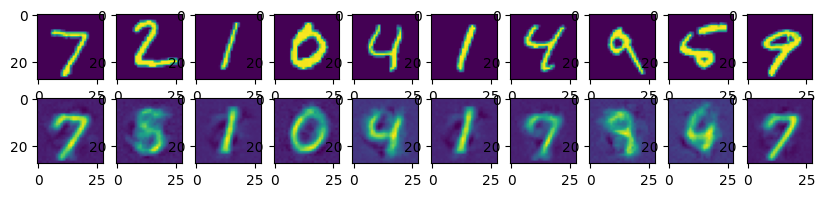

In [19]:
# Compare original images with their reconstructions
import matplotlib.pyplot as plt

f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
  a[0][i].imshow(np.reshape(x_image_test[i], (28,28)))
  a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))